parameters of lorenz system (s,r,b)=  10.0 28.0 2.6666666666666665
initial value(x0,y0,z0) = -1.34 -1.34 18.1
Tend =  10.0
number of steps =  10000


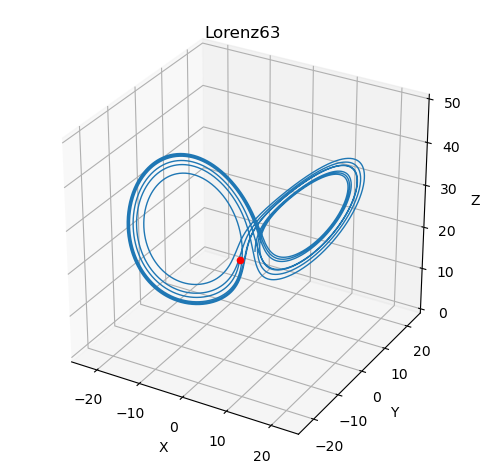

**COMPLETED**


In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
'''
================
Lorenz Chaos
================
Edward N. Lorenz(1963), `"Deterministic Nonperiodic Flow"
https://doi.org/10.1175/1520-0469(1963)020%3C0130:DNF%3E2.0.CO;2
'''
import numpy as np


def main():
    import os
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # for projection='3d'

    # parameters for lorenz system
    s= 10.0; r= 28.0; b= 8.0/3 
    print("parameters of lorenz system (s,r,b)= ",s,r,b)
    
    # Set initial values for lorenz system
    t0= 0.0
    x0= -1.34; y0= -1.34; z0= 18.1 #(x0,y0,z0)

    print("initial value(x0,y0,z0) =",x0,y0,z0)

# time setting
    Tend= 10.0                   #end time
    dt= 1.0e-3                   #time interval
    nstep= int((Tend-t0)/dt+0.5) #number of time steps     
    t= t0 + np.arange(0, nstep, 1)*dt #t[0:nstep]
    print("Tend = ",Tend)
    print("number of steps = ",nstep)
     
# calculate temporal evolution of position
    xt,yt,zt = lorenz_system_integrate(t, x0,y0,z0, s,r,b)

# make 3D Plot
    fig= plt.figure(figsize=(6, 6), dpi=100)
    ax = fig.gca(projection='3d')
    # 描画のカスタマイズ
    ax.set_title("Lorenz63")
    ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
    ax.set_xlim(-25, 25); ax.set_ylim(-25, 25); ax.set_zlim(  0, 50)

# show 3D trajectory figure
    ax.plot(xt[:], yt[:], zt[:], lw=1.0)
    ax.scatter(xt[0],yt[0],zt[0],color= 'red') #plot the initial position
    plt.show()
    fig.savefig("trajectory.png")


def lorenz_system_integrate(t, x0,y0,z0, s,r,b):
    # integration of ( nonlinear ) lorenz system with RK2
    #
    nstep= len(t)
    dt= t[1]-t[0] #time interval
    xt, yt, zt= np.zeros([nstep]), np.zeros([nstep]), np.zeros([nstep]) #zero set
    xt[0], yt[0], zt[0] = x0, y0, z0
    for n in range(nstep-1):
        dxdt,dydt,dzdt= lorenz_dot(xt[n],yt[n],zt[n],s,r,b)
        xtm, ytm, ztm = xt[n]+dxdt*dt*0.5, yt[n]+dydt*dt*0.5, zt[n]+dzdt*dt*0.5
        dxdt,dydt,dzdt= lorenz_dot(xtm,ytm,ztm,s,r,b)
        xt[n+1], yt[n+1], zt[n+1]= xt[n]+dxdt*dt, yt[n]+dydt*dt, zt[n]+dzdt*dt;        
    #
    return xt,yt,zt


def lorenz_dot(x,y,z, s,r,b):
    '''
    Given:
       (x,y,z), (s, r, b: parameters defining the lorenz system)
    Returns:
       (x_dot,y_dot,z_dot): temporal derivatives
    '''
    x_dot= s*(y - x)
    y_dot= r*x - y - x*z
    z_dot= x*y - b*z
    #
    return x_dot,y_dot,z_dot

# main
main()
print("**COMPLETED**")
